In [1]:
# read clean data with default info
import pandas as pd
import numpy as np
train_data = pd.read_csv("training_data.csv")
test_data = pd.read_csv("testing_data.csv")

In [2]:
# try different C in logistic regression to find the best coefficient
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100, 200, 500, 1000]
score_set = np.zeros((2, len(c)))
X = train_data.iloc[:, :-1]
Y = train_data.iloc[:, -1]
i = 0
for element in c:
    logreg = linear_model.LogisticRegression(C=element, penalty='l2')
    logreg.fit(X, Y)
    score_set[0, i] = logreg.score(X, Y)
    score_set[1, i] = logreg.score(test_data.iloc[:, :-1], test_data.iloc[:, -1])
    i = i + 1

[[ 0.72017627  0.7198615   0.72773056  0.71954674  0.72804533  0.72584199
   0.72647151  0.7198615   0.72584199  0.72710104  0.73717343  0.71702864]
 [ 0.63509545  0.63729809  0.63362702  0.63876652  0.63509545  0.6328928
   0.63582966  0.63950073  0.63876652  0.63582966  0.63509545  0.63509545]]


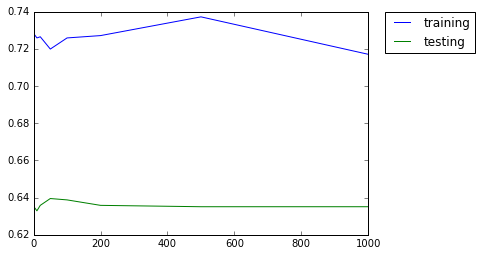

In [3]:
%matplotlib inline
print(score_set)
plt.plot(c, score_set[0, :], label='training')
plt.plot(c, score_set[1, :], label='testing')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()